In [102]:
import tensorflow as tf
from tensorflow.keras.applications import resnet50, vgg16, vgg19
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

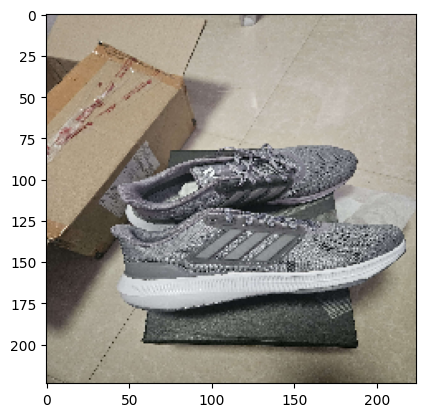

In [103]:
model_resnet50 = resnet50.ResNet50(weights='imagenet')
model_vgg16 = vgg16.VGG16(weights='imagenet')
model_vgg19 = vgg19.VGG19(weights='imagenet')

img = image.load_img("pictures_for_pred/shoes.jpg", target_size=(224, 224))
plt.imshow(img)

In [104]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # to do: create custom internal function para di paulit-ulit sa each model type
    # potential problem: need hiwalay para sa 3 models for the 2x2 graph
    # may isang graph na lagpas ang percentage, need to enlarge graph size equally or find to do proportionally

    img_array_resnet50 = resnet50.preprocess_input(img_array.copy())
    img_array_vgg16 = vgg16.preprocess_input(img_array.copy())
    img_array_vgg19 = vgg19.preprocess_input(img_array.copy())

    pred_resnet50 = model_resnet50.predict(img_array_resnet50)
    decoded_resnet50_predictions = sorted(resnet50.decode_predictions(pred_resnet50, top=5)[0], key=lambda x: x[2], reverse=True)

    pred_vgg16 = model_vgg16.predict(img_array_vgg16)
    decoded_vgg16_predictions = sorted(vgg16.decode_predictions(pred_vgg16, top=5)[0], key=lambda x: x[2], reverse=True)

    pred_vgg19 = model_vgg19.predict(img_array_vgg19)
    decoded_vgg19_predictions = sorted(vgg19.decode_predictions(pred_vgg19, top=5)[0], key=lambda x: x[2], reverse=True)

    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].imshow(img)
    ax[0, 0].axis('off')
    ax[0, 0].set_title('Input Image')

    resnet50_labels = [f"{label}" for (_, label, score) in decoded_resnet50_predictions]
    resnet50_scores = [score for (_, _, score) in decoded_resnet50_predictions]
    ax[0, 1].barh(resnet50_labels, resnet50_scores, color='skyblue')
    ax[0, 1].invert_yaxis() # para baligtad
    ax[0, 1].set_xlim(0, 1)
    ax[0, 1].set_title('ResNet50 Predictions')
    for i, score in enumerate(resnet50_scores):
        ax[0, 1].text(score + 0.02, i, f"{round(score * 100, 2)}%", va='center')

    vgg16_labels = [f"{label}" for (_, label, score) in decoded_vgg16_predictions]
    vgg16_scores = [score for (_, _, score) in decoded_vgg16_predictions]
    ax[1, 0].barh(vgg16_labels, vgg16_scores, color='lightgreen')
    ax[1, 0].invert_yaxis()
    ax[1, 0].set_xlim(0, 1)
    ax[1, 0].set_title('VGG16 Predictions')
    for i, score in enumerate(vgg16_scores):
        ax[1, 0].text(score + 0.02, i, f"{round(score * 100, 2)}%", va='center')

    vgg19_labels = [f"{label}" for (_, label, score) in decoded_vgg19_predictions]
    vgg19_scores = [score for (_, _, score) in decoded_vgg19_predictions]
    ax[1, 1].barh(vgg19_labels, vgg19_scores, color='lightcoral')
    ax[1, 1].invert_yaxis()
    ax[1, 1].set_xlim(0, 1)
    ax[1, 1].set_title('VGG19 Predictions')
    for i, score in enumerate(vgg19_scores):
        ax[1, 1].text(score + 0.02, i, f"{round(score * 100, 2)}%", va='center')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 200ms/step


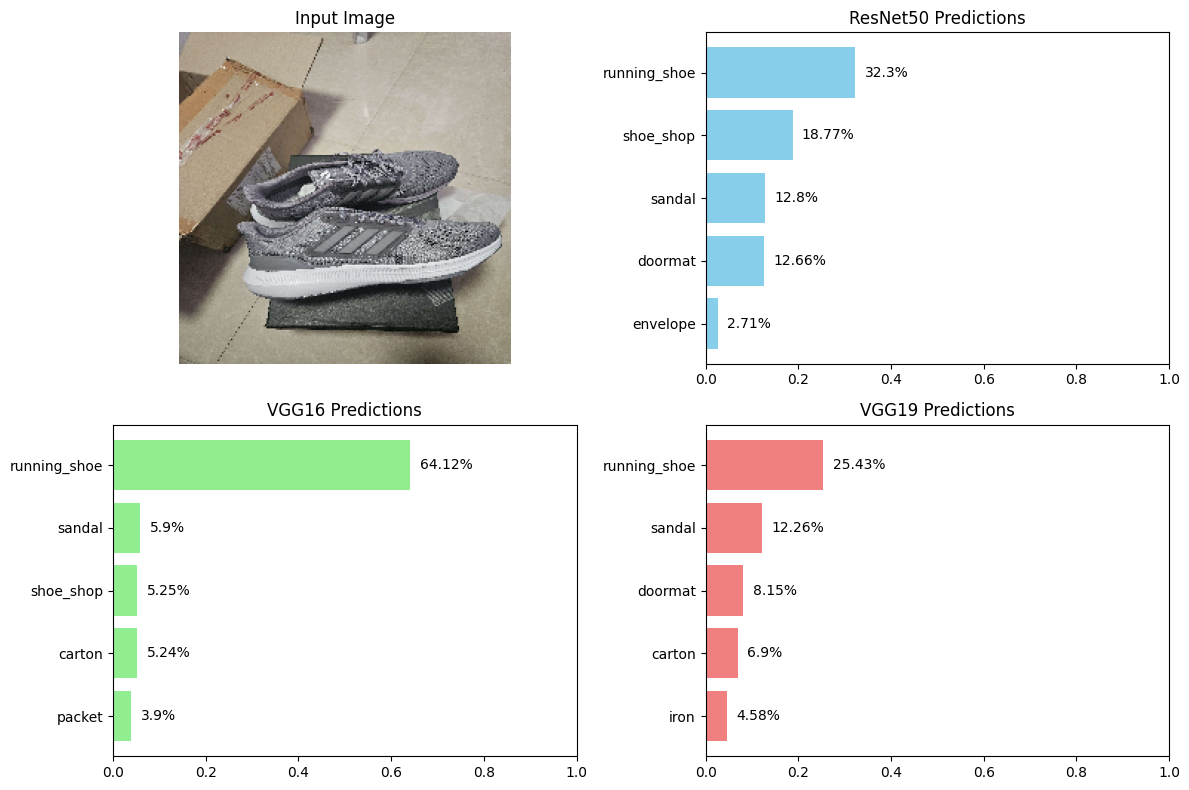

In [105]:
predict_image('pictures_for_pred/shoes.jpg')

1/1 [==============================] - 0s 120ms/step


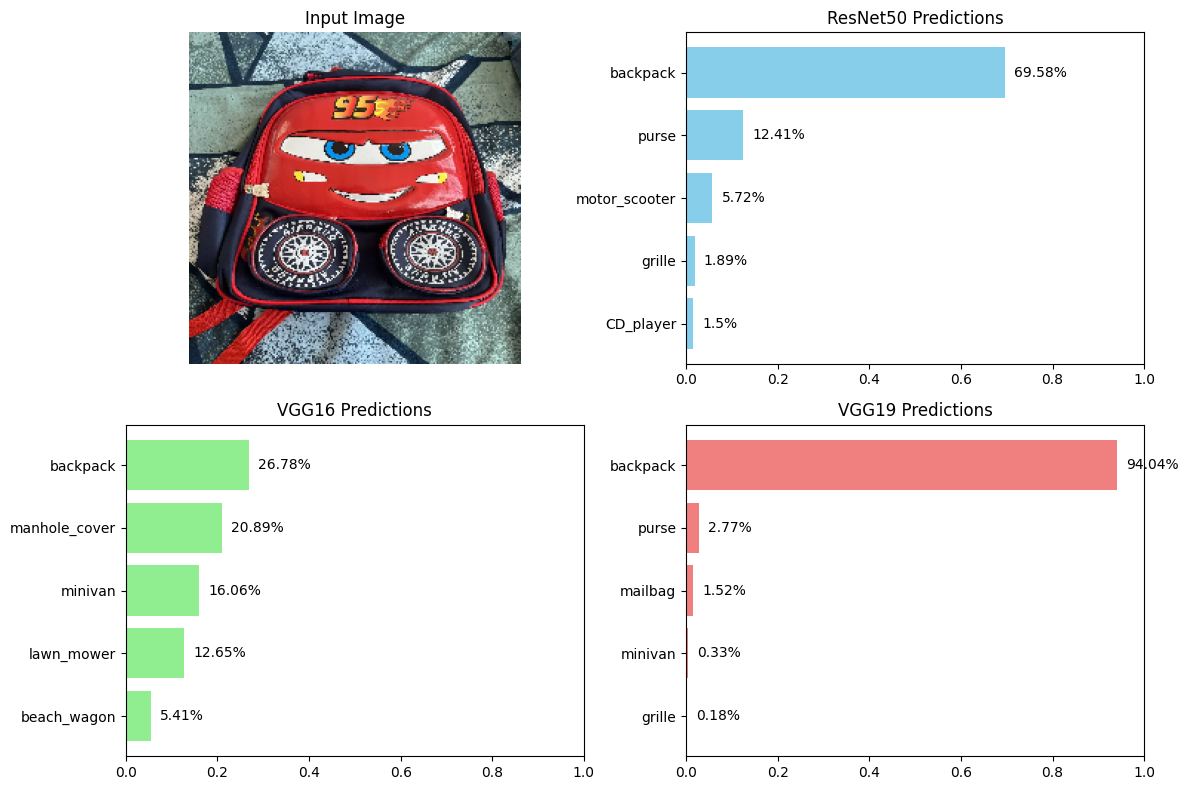

In [106]:
predict_image('pictures_for_pred/bag.png')

1/1 [==============================] - 0s 123ms/step


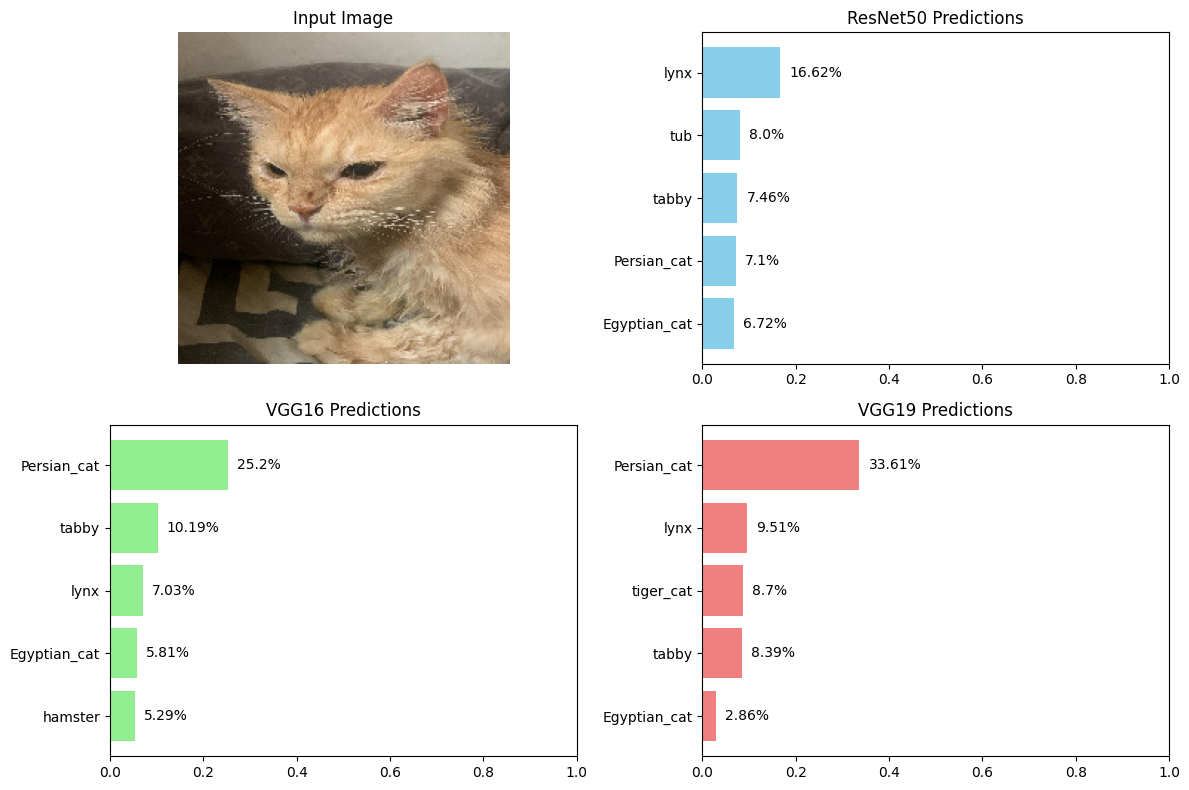

In [107]:
predict_image('pictures_for_pred/cat.jpg')

1/1 [==============================] - 0s 117ms/step


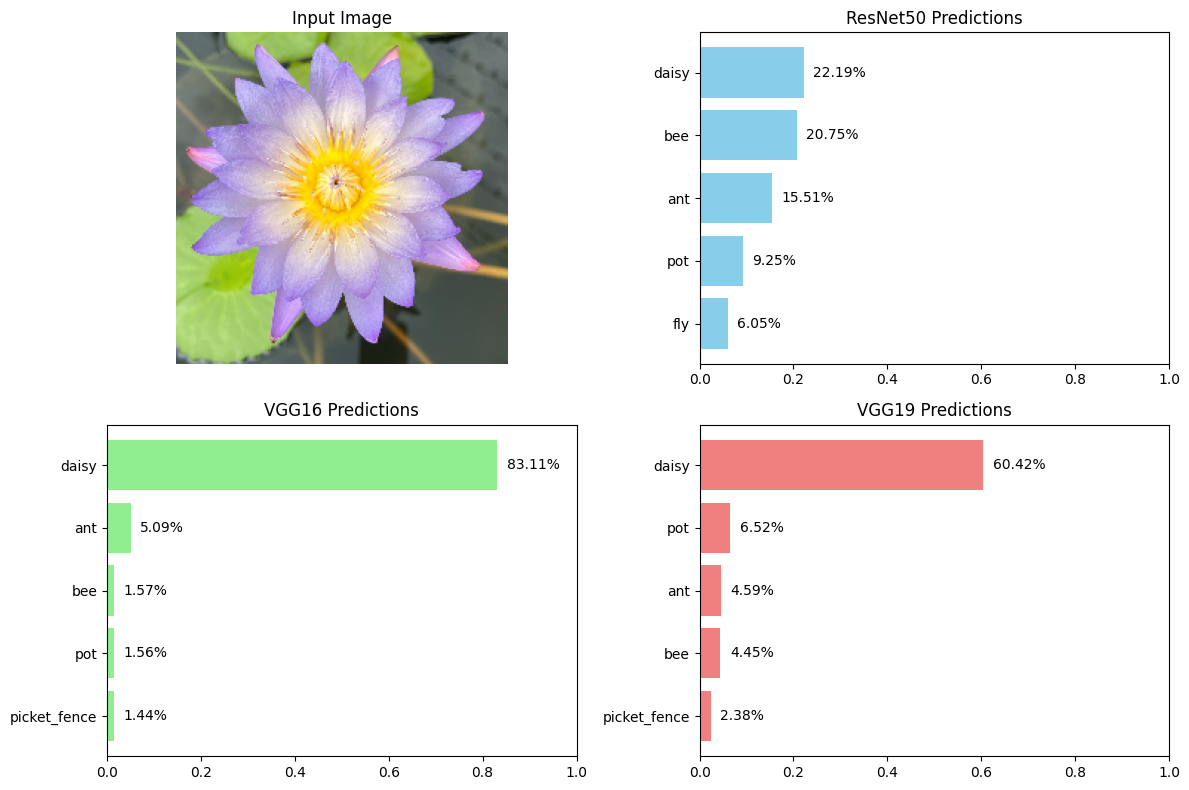

In [108]:
predict_image('pictures_for_pred/flower.png')

1/1 [==============================] - 0s 117ms/step


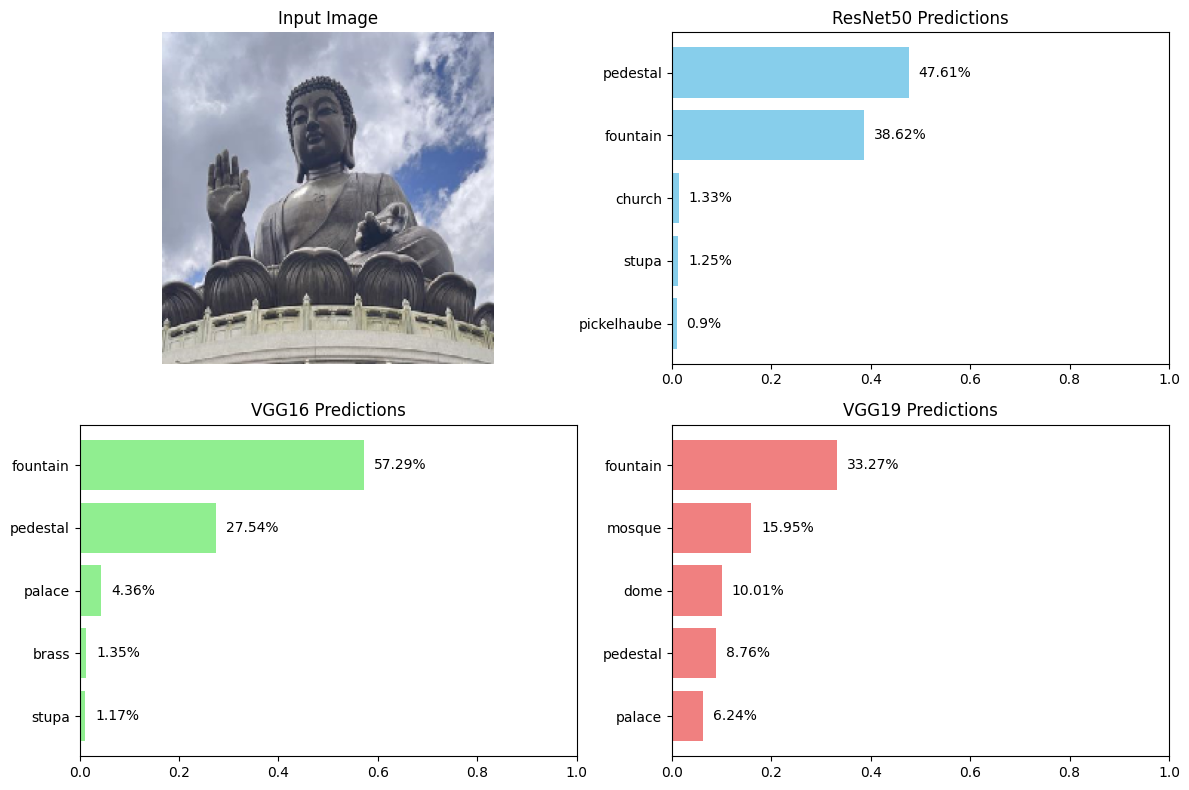

In [109]:
predict_image('pictures_for_pred/statue.png')

1/1 [==============================] - 0s 121ms/step


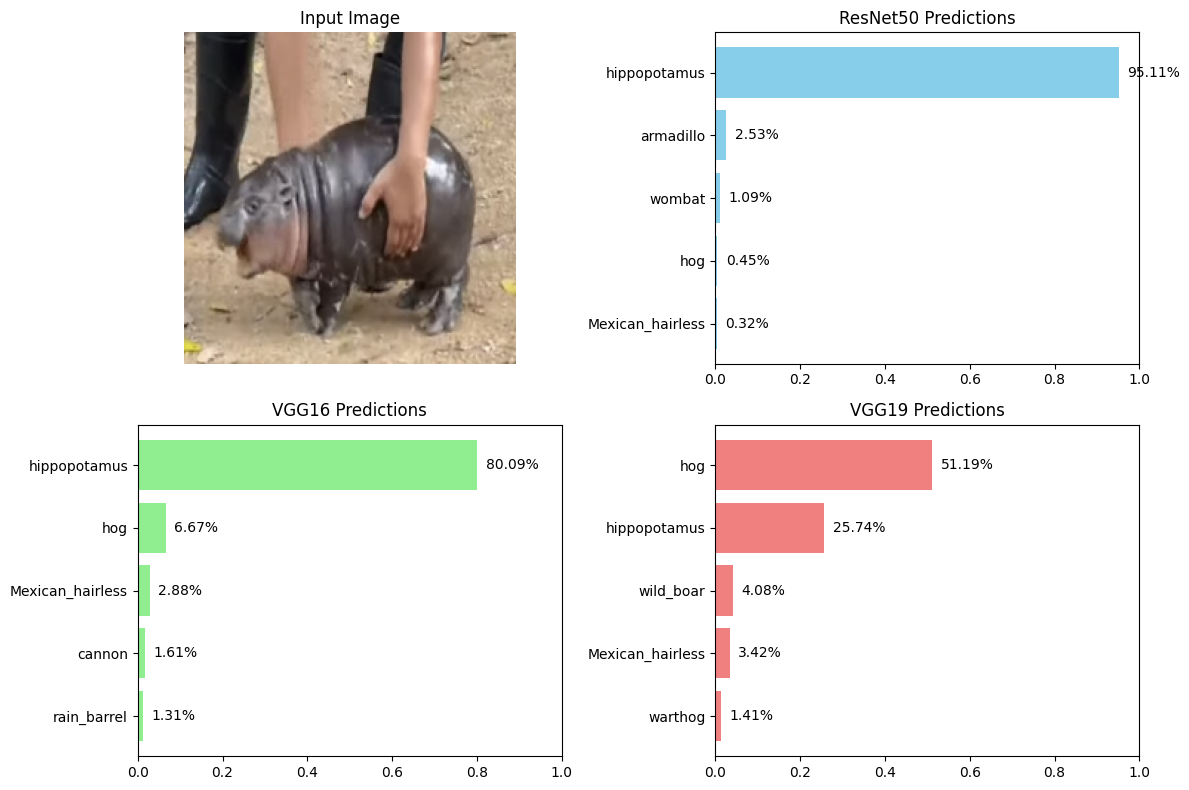

In [110]:
predict_image('pictures_for_pred/moo_deng.jpg')